# Titanic competition

<a id="table_of_contents"></a>
## Table of contents

* [Titanic competition](#)
    * [Project overview](#project_overview)
        * [ ] [Short story](#)
        * [ ] [Goal](#)
        * [x] [Data description](#)
    * [Introduce with data](#introduce)
        * [x] [Import libs](#import_libs)
        * [x] [Import data and first impression](#import_data)
        * [ ] [Brief conclusions](#brief_conclusions)
    * [Data analysis](#data_analysis)
        * [x] [Duplicates](#duplicates)
        * [x] [Data visualisation](#data_visualisation)
            * [x] [Target feature](#target_feature)
            * [x] [Categorial features](#categorial_features)
            * [x] [Numerical features](#numerical_features)
        * [ ] [Data preparation](#data_preparation)
            * [ ] [Fill NA](#fill_na)
            * [ ] [New features](#new_features)
        * [ ] [Multicolleniar](#multicolleniar)
        * [ ] [Conclusions](#conclusions)   
    * [Models](#models)
        * [ ] [Features and target](#)
        * [ ] [Logistic Regression](#lr)
        * [ ] [Random Forest](#rf)
        * [ ] [Boosting](#)
        * [ ] [Result](#)
    * [Test](#)
        * [ ] [Test data preparetion](#tets_data_preparetion)
        * [ ] [Forecasting](#forecasting)
        * [ ] [Brief conclusions](#brief_conclusions_2)
    * [Resume](#resume)
        

<a id="project_overview"></a>
## Project overview

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

[to the table of contents](#table_of_contents)
<a id="short_story"></a>

### Short story

[to the table of contents](#table_of_contents)
<a id="goal"></a>

### Goal

[to the table of contents](#table_of_contents)
<a id="data_description"></a>

### Data description

#### Variables


|# | Variable | Definition | Key |
|:-|:---------|:-----------|:----|		
|1 | survival |	Survival   | 0 = No, 1 = Yes |
|2 | pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|3 | sex |	Sex | |	
|4 | Age |	Age in years | | 	
|5 | sibsp | # of siblings / spouses aboard the Titanic | |
|6 | parch | # of parents / children aboard the Titanic | | 	
|7 | ticket | Ticket number | |
|8 | fare | Passenger fare | |
|9 | cabin | Cabin number | |
|10 | embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


#### Variable Notes

- pclass: A proxy for socio-economic status (SES)
        
        1st = Upper
        2nd = Middle
        3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5



- sibsp: The dataset defines family relations in this way...

        Sibling = brother, sister, stepbrother, stepsister
        Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
        
        Parent = mother, father
        Child = daughter, son, stepdaughter, stepson
        Some children travelled only with a nanny, therefore parch=0 for them.

[to the table of contents](#table_of_contents)
<a id="introduce"></a>

## Introduce with data

[to the table of contents](#table_of_contents)
<a id="import_libs"></a>

### Import libs

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy.random import RandomState

from phik import phik_matrix
from phik.report import plot_correlation_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[to the table of contents](#table_of_contents)
<a id="import_data"></a>

### Import data and first impression

In [2]:
# let's check which files do we have
datasets_dir = '../datasets/titanic'

if not os.path.isdir(datasets_dir):
    datasets_dir = '/kaggle/input'
    
for dirname, _, filenames in os.walk(datasets_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../datasets/titanic/test.csv
../datasets/titanic/train.csv
../datasets/titanic/gender_submission.csv


#### Train dataset

In [3]:
# upload train dataset
df_train = pd.read_csv(os.path.join(datasets_dir, 'train.csv'))

# check shape of the dataset
print('Shape of the train dataset:', df_train.shape, end='\n\n')

# watch first 10 rows
print('First five rows of the train dataset:')
display(df_train.head(10))

Shape of the train dataset: (891, 12)

First five rows of the train dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# train dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Test dataset

In [5]:
# upload gender test dataset
df_test = pd.read_csv(os.path.join(datasets_dir, 'test.csv'))

# check shape of the dataset
print('Shape of the test dataset:', df_test.shape, end='\n\n')

# watch first 10 rows in it
print('First five rows in the test dataset:')
display(df_test.head(10))

Shape of the test dataset: (418, 11)

First five rows in the test dataset:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
# test dataset info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Gender submission

In [7]:
# upload gender submission dataset
df_gender = pd.read_csv(os.path.join(datasets_dir, 'gender_submission.csv'))

# check shape of the dataset
print('Shape of the gender_submission dataset:', df_gender.shape, end='\n\n')

# watch first 5 rows in it
print('First five rows in the gender submission dataset:')
display(df_gender.head())

Shape of the gender_submission dataset: (418, 2)

First five rows in the gender submission dataset:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


[to the table of contents](#table_of_contents)
<a id="brief_conclusions"></a>

### Brief conclusions

So...

[to the table of contents](#table_of_contents)
<a id="data_analysis"></a>

## Data analysis

<a id="duplicates"></a>

### Duplicates
Let's check are there duplicates or not?

In [8]:
print(df_train.duplicated().sum())

0


#### Hidden duplicates

There is not any hidden duplicate

[to the table of contents](#table_of_contents)
<a id="data_visualisation"></a>

### Data visualisation

<a id="target_feature"></a>

#### Target feature

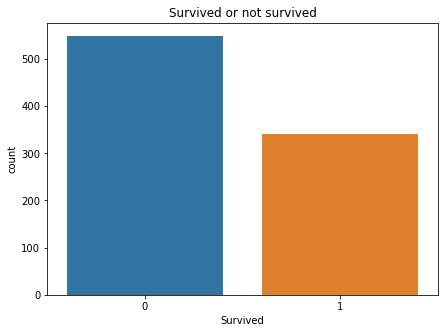

In [9]:
# Let's compare the number of survivos and the number of deceased on the graph:
plt.figure(figsize=(7,5))
sns.countplot(x='Survived', data=df_train)
plt.title('Survived or not survived')
plt.show()

Unfortunately, the number of survivors is significantly less than the number of deceased.

[to the table of contents](#table_of_contents)
<a id="categorial_features"></a>

#### Categorial features

In [10]:
cat_features = ['Pclass', 'Sex', 'Embarked']

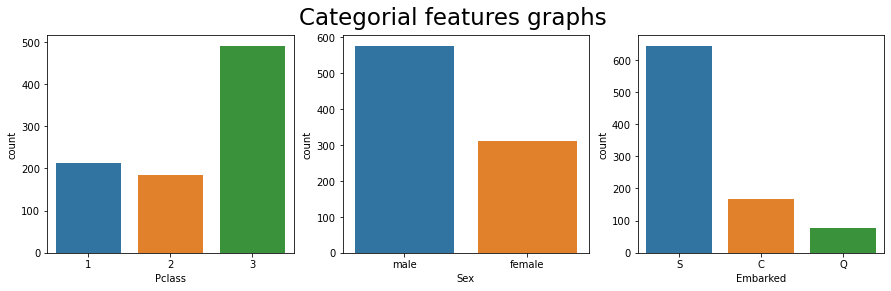

In [11]:
# create figure with three slots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# do the monomer massive from the axis
for i, ax in enumerate(axes.flat):
    sns.countplot(x=cat_features[i], data=df_train[cat_features].dropna(axis=0), ax=ax)
    
fig.suptitle('Categorial features graphs', fontsize=23)
plt.show()

##### Let's plot categorial features by target

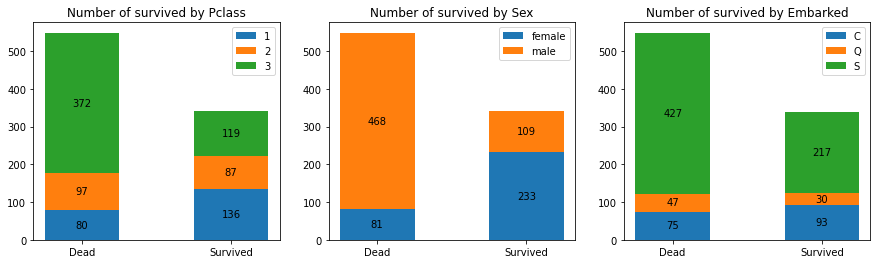

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, column in enumerate(cat_features):
    df = df_train.pivot_table(index='Survived', columns=column, aggfunc='count')['PassengerId']
    ax = axes[i]
    bottom = np.zeros(2)
    width = 0.5
    species = ('Dead', 'Survived')
    for clmn, array in df.items():
        p = ax.bar(species, array, width, label=clmn, bottom=bottom)
        bottom += array
        ax.bar_label(p, label_type='center')
        
    ax.set_title(f'Number of survived by {column}')
    ax.legend()
    
plt.show()

##### Let's plot target by categorial features:

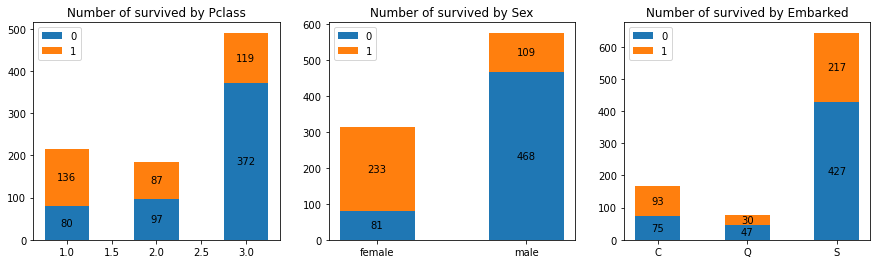

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for i, column in enumerate(cat_features):
    df = df_train.pivot_table(index=column, columns='Survived', aggfunc='count')['PassengerId']
    ax = axes[i]
    bottom = np.zeros(len(df))
    width = 0.5
    species = df.index.values
    for clmn_name, clmn_values in df.items():
        p = ax.bar(species, clmn_values, width, label=clmn_name, bottom=bottom)
        bottom += clmn_values
        ax.bar_label(p, label_type='center')
        
    ax.set_title(f'Number of survived by {column}')
    ax.legend()

plt.show()

<a id="brief_conclusions_categorial_features"></a>

##### Brief conclusions

So, we can see that most part of deasesed is the third class passangers. 

[to the table of contents](#table_of_contents)
<a id="numerical_features"></a>

#### Numerical features

Let's plot 

In [14]:
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [15]:
display(df_train[num_features].describe())

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


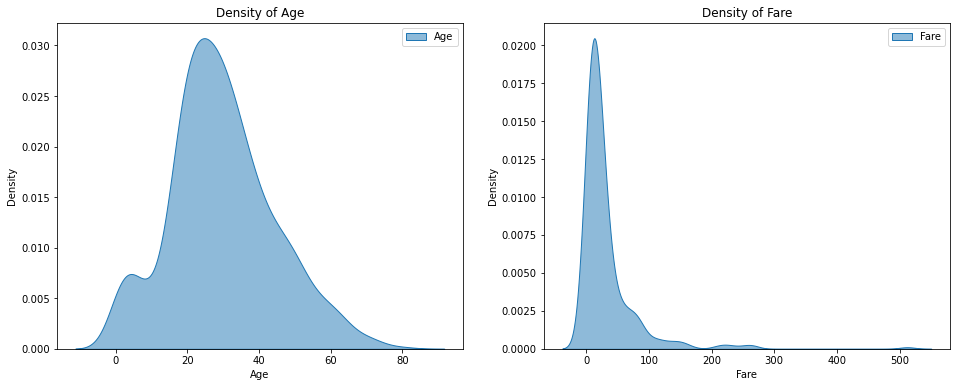

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
for i, feature in enumerate(['Age', 'Fare']):
    ax = axes.flat[i]
    sns.kdeplot(df_train[feature]
               , gridsize=500
               , bw_adjust=1
               , common_grid=True
               , fill=True
               , alpha=0.5
               , label=feature
               , ax=ax)
    ax.set_title(f'Density of {feature}')
    ax.legend()


plt.show()

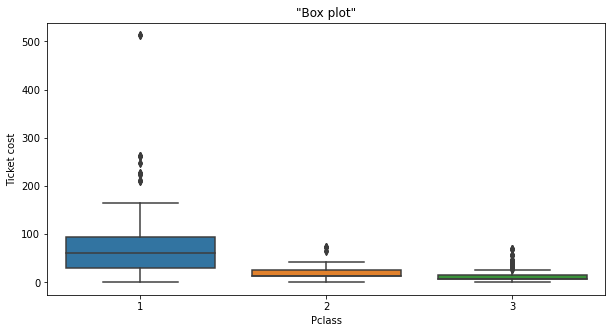

In [17]:
# import seaborn as sns

plt.figure(figsize=(10, 5))

sns.boxplot(data=df_train, x='Pclass',y='Fare')

plt.title('"Box plot"')
plt.xlabel('Pclass')
plt.ylabel('Ticket cost')

plt.show()

[to the table of contents](#table_of_contents)
<a id="data_preparation"></a>

### Data preparation

[to the table of contents](#table_of_contents)
<a id="fill_na"></a>

#### Fill na

##### Embarked

In [18]:
display(df_train[df_train['Embarked'].isnull()])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
display(df_train[df_train['Cabin']=='B28'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
display(df_train[df_train['Ticket']=='113572'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [25]:
display(df_train[df_train['Pclass']== 1]['Embarked'].value_counts())

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [26]:
df_train['Embarked'] = df_train['Embarked'].fillna('hz')

##### Age

In [27]:
df_train['Age'] = df_train.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))

#### Cabin

In [28]:
df_train.loc[df_train['Pclass'] == 1, 'Cabin'] = df_train.loc[df_train['Pclass'] == 1, 'Cabin'].fillna('1clCabin')
df_train.loc[df_train['Pclass'] == 2, 'Cabin'] = df_train.loc[df_train['Pclass'] == 2, 'Cabin'].fillna('2clCabin')
df_train['Cabin'] = df_train['Cabin'].fillna('not info')
df_train['CabinLatter'] = df_train['Cabin'].str[0]
print(df_train['CabinLatter'].value_counts())

n    479
2    168
C     59
B     47
1     40
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinLatter, dtype: int64


[to the table of contents](#table_of_contents)
<a id="new_features"></a>

### New features

In [ ]:
df_train['HasCabin'] = np.where(df_train['Cabin'].isna(), 'doesnt', 'has cabin')

In [ ]:
display(df_train['HasCabin'].value_counts())

In [ ]:
f, ax = plt.subplots(figsize=(12, 4))
df = df_train.pivot_table(index='Survived', columns='HasCabin', aggfunc='count')['PassengerId']

bottom = np.zeros(2)
width = 0.5
species = ('Dead', 'Survived')
for clmn, array in df.items():
    p = ax.bar(species, array, width, label=clmn, bottom=bottom)
    bottom += array
    ax.bar_label(p, label_type='center')

ax.set_title(f'Number of survived by HasCabin')
ax.legend()

plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
df = df_train.pivot_table(index='CabinLatter', columns='Pclass', aggfunc='count')['PassengerId']
df = df.fillna(0)

bottom = np.zeros(len(df))
width = 0.5
species = df.index.values
for clmn, array in df.items():
    p = ax.bar(species, array, width, label=clmn, bottom=bottom)
    bottom += array
    ax.bar_label(p, label_type='center')

ax.set_title(f'Number of ')
ax.legend()

plt.show()

In [ ]:
display(df)

In [ ]:
df_train['CabinLatter'] = df_train['Cabin'].str[0]
print(df_train['CabinLatter'].value_counts())

In [ ]:
df_train = df_train[df_train['Fare'] < 300]

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df_train, x='CabinLatter',y='Fare')

plt.title('"Boxplot" Ticket coast by cabinletter')
plt.xlabel('Cabin letter')
plt.ylabel('ticket coast')

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
for i, feature in enumerate(['SibSp', 'Parch']):
    ax = axes.flat[i]
    sns.countplot(x=feature, data=df_train, hue=feature, ax=ax)
    ax.set_title(f'Density of {feature}')
    ax.legend()

plt.show()


[to the table of contents](#table_of_contents)
<a id="multicolinear"></a>

### Multicollinearity

In [29]:
matrix = phik_matrix(df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1), interval_cols = ['Age', 'Fare'])
display(matrix)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinLatter
Survived,1.000000,0.205464,0.750322,0.206987,0.175652,0.147080,0.265387,0.500411,0.260620,0.379479
Pclass,0.205464,1.000000,0.078281,0.403983,0.216296,0.033361,0.588122,1.000000,0.275404,0.970850
Sex,0.750322,0.078281,1.000000,0.139025,0.192974,0.231568,0.176741,0.287474,0.189364,0.204029
Age,0.206987,0.403983,0.139025,1.000000,0.391505,0.403291,0.185316,0.802617,0.230608,0.334121
SibSp,0.175652,0.216296,0.192974,0.391505,1.000000,0.589912,0.497583,0.000000,0.089258,0.134419
Parch,0.147080,0.033361,0.231568,0.403291,0.589912,1.000000,0.337206,0.000000,0.000000,0.077820
Fare,0.265387,0.588122,0.176741,0.185316,0.497583,0.337206,1.000000,0.975412,0.244597,0.542446
Cabin,0.500411,1.000000,0.287474,0.802617,0.000000,0.000000,0.975412,1.000000,0.878786,1.000000
Embarked,0.260620,0.275404,0.189364,0.230608,0.089258,0.000000,0.244597,0.878786,1.000000,0.375755
CabinLatter,0.379479,0.970850,0.204029,0.334121,0.134419,0.077820,0.542446,1.000000,0.375755,1.000000


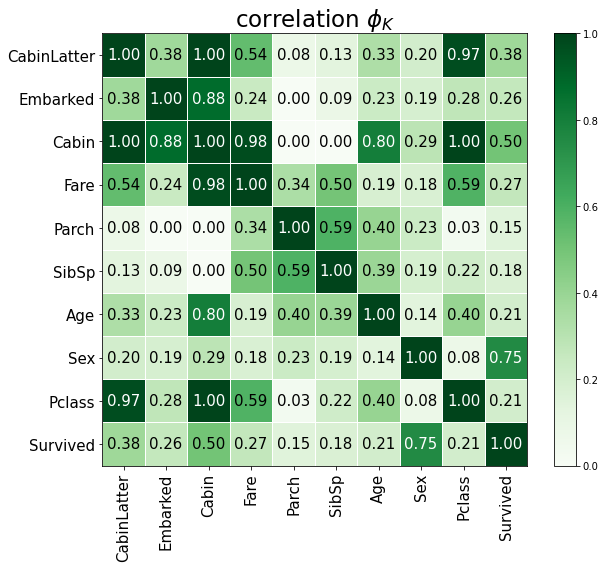

In [30]:
# Построим график:

plot_correlation_matrix(np.array(matrix)
                        , x_labels=matrix.columns
                        , y_labels=matrix.index
                        , vmin=0
                        , vmax=1
                        , color_map="Greens"
#                         , title=r"correlation $\phi_K$"
                        , fontsize_factor=1.5
                        , figsize=(9, 8))
plt.title(r"correlation $\phi_K$", size=23)
plt.tight_layout()

[to the table of contents](#table_of_contents)
<a id="conclusions"></a>

### Conclusions

[to the table of contents](#table_of_contents)
<a id="models"></a>

## Models

In [ ]:
RANDOM_STATE = 232111

[to the table of contents](#table_of_contents)
<a id="features_and_target"></a>

### Features and target

In [ ]:
features = df_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
target = df_train['Survived']


print(features.shape)
print(target.shape)

[to the table of contents](#table_of_contents)
<a id="lr"></a>

### Logistic regressor

In [ ]:
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare']
categ_columns = list(features.columns)
for column in numeric_columns:
    categ_columns.remove(column)

print('Numeric params:')
print(*numeric_columns)
print('\n')
print('Categorial params:')
print(*categ_columns)

In [ ]:
%%time
column_trans = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_columns),
    ('categorial', OneHotEncoder(drop='first'), categ_columns)
])


# Создание пайплайна для последовательного выполнения препроцессора и модели
pipeline = Pipeline([
    ('column_trans', column_trans),
    ('logreg', LogisticRegression(random_state = RANDOM_STATE))
])

# Определение сетки параметров для GridSearchCV
param_grid = {
    'logreg__C': [0.1, 1, 10]
}

# Создание объекта GridSearchCV
gs_logreg = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=False)

# Обучаем модель на тренировочных данных
gs_logreg.fit(train_features, train_target)

# # Лучшие параметры модели
# best_params = gs_logreg.best_params_

# # Лучшая модель
# best_model = gs_logreg.best_estimator_


# Выводим наилучшие параметры и оценку метрики 
print("Best parameters: ", gs_logreg.best_params_)
print("Best AUC_ROC: ", gs_logreg.best_score_)